In [1]:
# Load Libraries needed 
import pandas as pd
import numpy as np 
import statistics as st
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv("adult.csv")
# Describe the dataset attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
# Display 10 rows of the dataset
data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [4]:
# Remove missing or duplicated values
data.replace("?", np.nan, inplace=True)
data.dropna(inplace=True)
data.duplicated() #none

1        False
3        False
4        False
5        False
6        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 30162, dtype: bool

In [5]:
data_e=data.copy()
col_to_drop=['fnlwgt', 'education'] # dropping innecessary columns
data_e.drop(col_to_drop, inplace=True, axis=1)

In [6]:
##################### Convert categorical variables into numerical variables by Label encoding ################################
Oe = OrdinalEncoder()
data_e[['income']] = Oe.fit_transform(data[['income']]) # encoding income

#encoding categorical attributes
from sklearn.preprocessing import OneHotEncoder
categorical_cols=['marital.status','relationship','sex','workclass','occupation','race','native.country']
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(data_e[categorical_cols]))
OH_cols_train.index = data_e.index #one-hot encoding removed index; put it back
num_X_train = data_e.drop(categorical_cols, axis=1) #remove categorical columns (will replace with one-hot encoding)
data_e = pd.concat([num_X_train, OH_cols_train], axis=1) #add one-hot encoded columns to numerical features

In [7]:
# Display the dataset after encoding 
data_e

,age,education.num,capital.gain,capital.loss,hours.per.week,income,0,1,2,3,...,72,73,74,75,76,77,78,79,80,81
1,82,9,0,4356,18,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,54,4,0,3900,40,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,41,10,0,3900,40,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,34,9,0,3770,45,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,38,6,0,3770,40,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,0,0,40,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,27,12,0,0,38,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,40,9,0,0,40,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,58,9,0,0,40,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


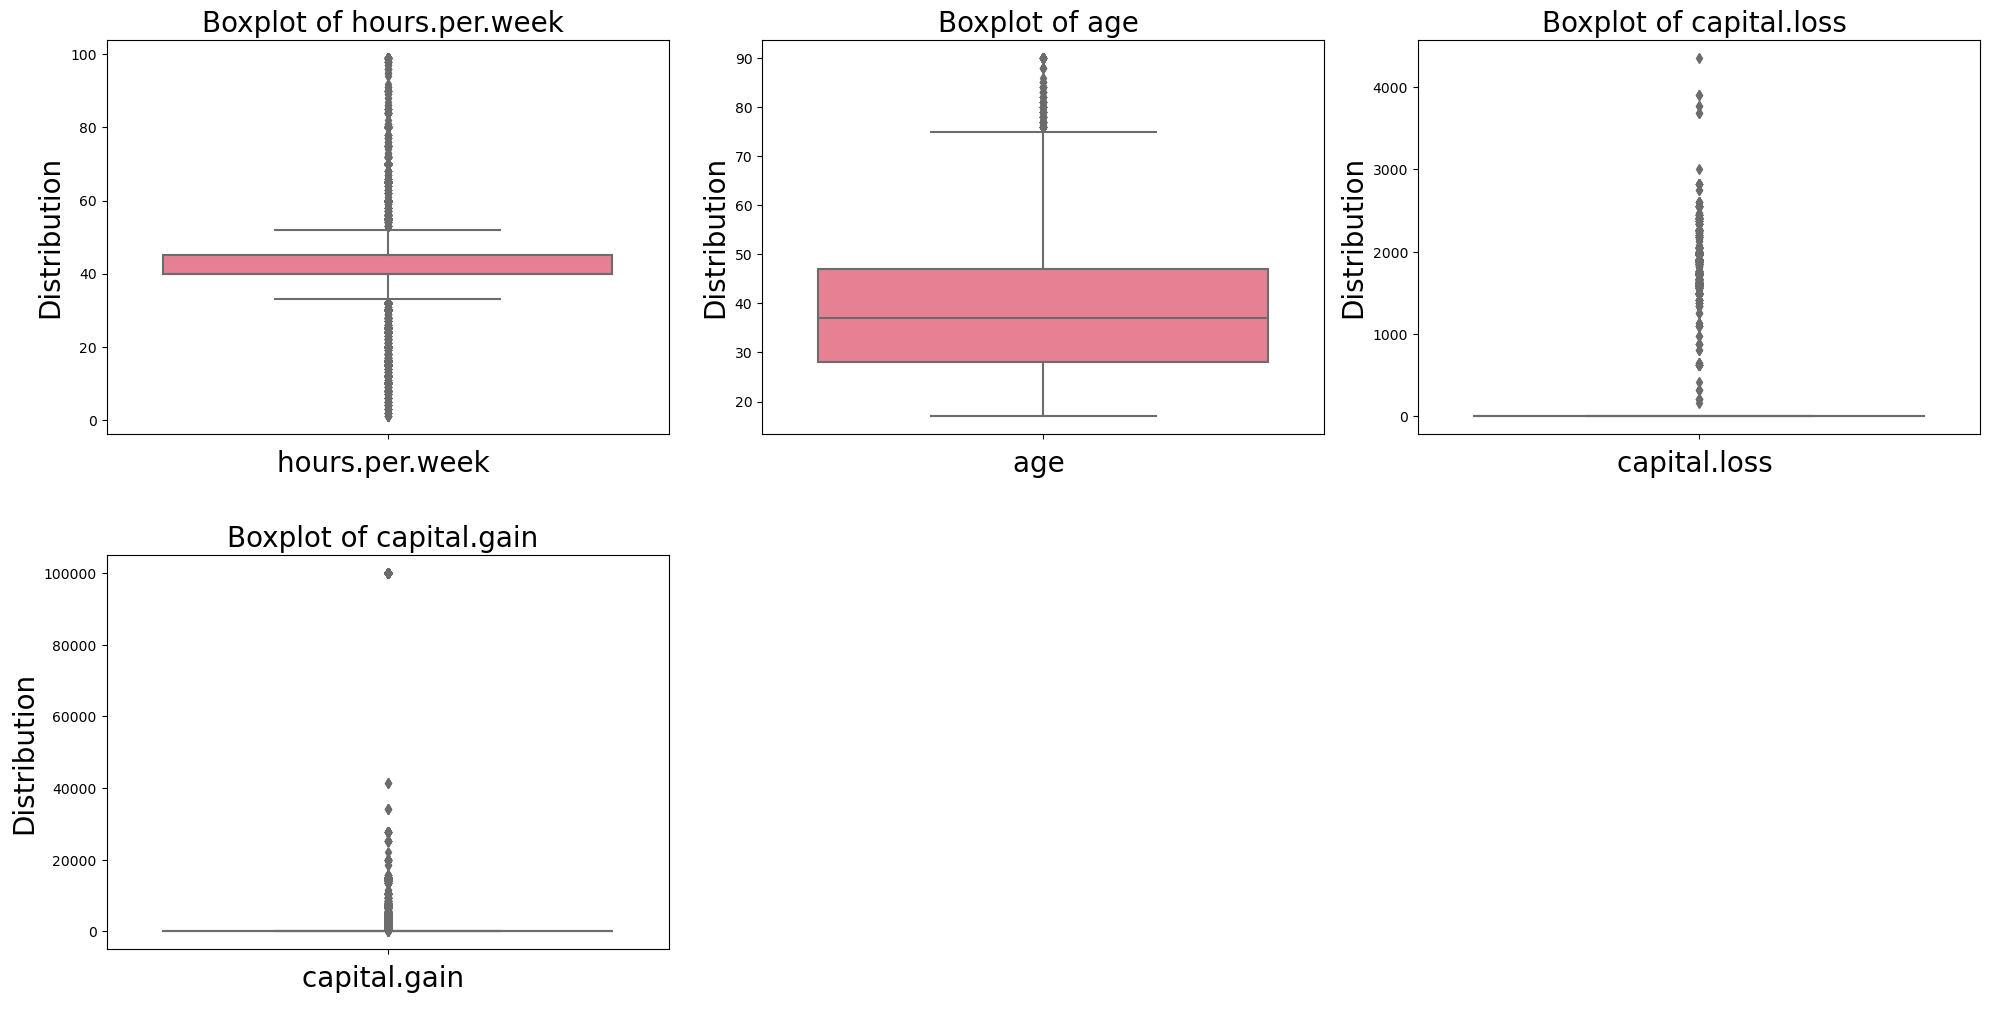

In [8]:
####################################### Checking for Outliers #####################################################
plt.figure(figsize=(20, 20))
numeric_cols = data_e[['hours.per.week','age','capital.loss','capital.gain']]

for i, column in enumerate(numeric_cols.columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=column, data=data_e, palette='husl')
    plt.xlabel('{} \n'.format(column), fontsize=20)
    plt.ylabel('Distribution', fontsize=20)
    plt.title('Boxplot of {} '.format(column), fontsize=20)
plt.tight_layout()
plt.show()

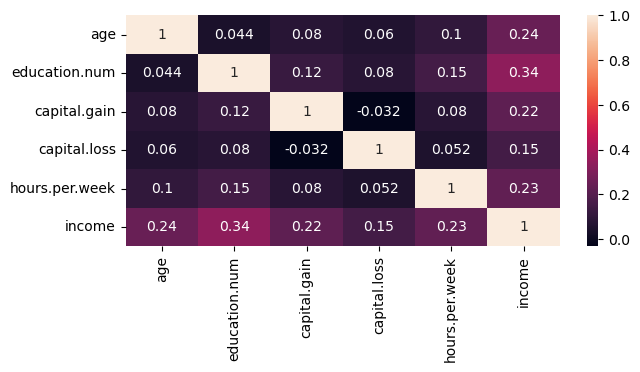

In [9]:
plt.figure(figsize=(7,3))
corr = data_e.iloc[:, :6].corr(numeric_only = True)
sns.heatmap(corr, annot=True)
plt.show()

In [10]:
# Display Summary statistics of the dataset 
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
###################################### Displaying Mode ###################################
coco = data[['age', 'workclass', 'fnlwgt', 'education.num', 'marital.status', 'occupation', 'relationship', 
             'race', 'sex', 'capital.gain', 'capital.loss','hours.per.week', 'native.country', 'income']]
for i, co in enumerate(coco.columns):
    print("Mode value of [", co, "] is:", st.mode(data[co]))

Mode value of [ age ] is: 36
Mode value of [ workclass ] is: Private
Mode value of [ fnlwgt ] is: 203488
Mode value of [ education.num ] is: 9
Mode value of [ marital.status ] is: Married-civ-spouse
Mode value of [ occupation ] is: Prof-specialty
Mode value of [ relationship ] is: Husband
Mode value of [ race ] is: White
Mode value of [ sex ] is: Male
Mode value of [ capital.gain ] is: 0
Mode value of [ capital.loss ] is: 0
Mode value of [ hours.per.week ] is: 40
Mode value of [ native.country ] is: United-States
Mode value of [ income ] is: <=50K


<Axes: xlabel='income', ylabel='count'>

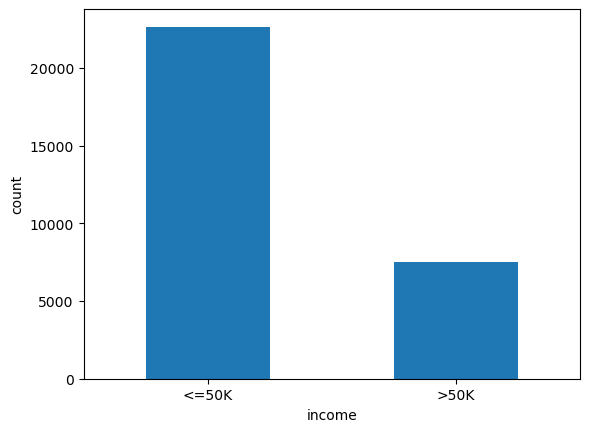

In [12]:
############################################## Visualizations #####################################################
# Bar Chart
data['income'].value_counts().plot(kind='bar',xlabel='income',ylabel='count',rot=0)

<Axes: >

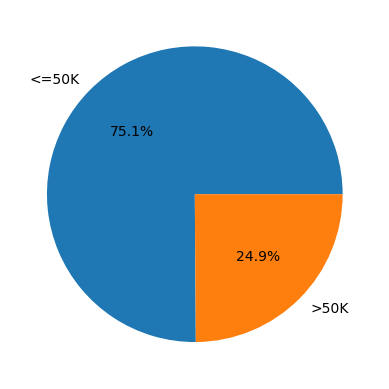

In [13]:
# Pie chart
data.groupby('income').size().plot(kind='pie',autopct='%1.1f%%')

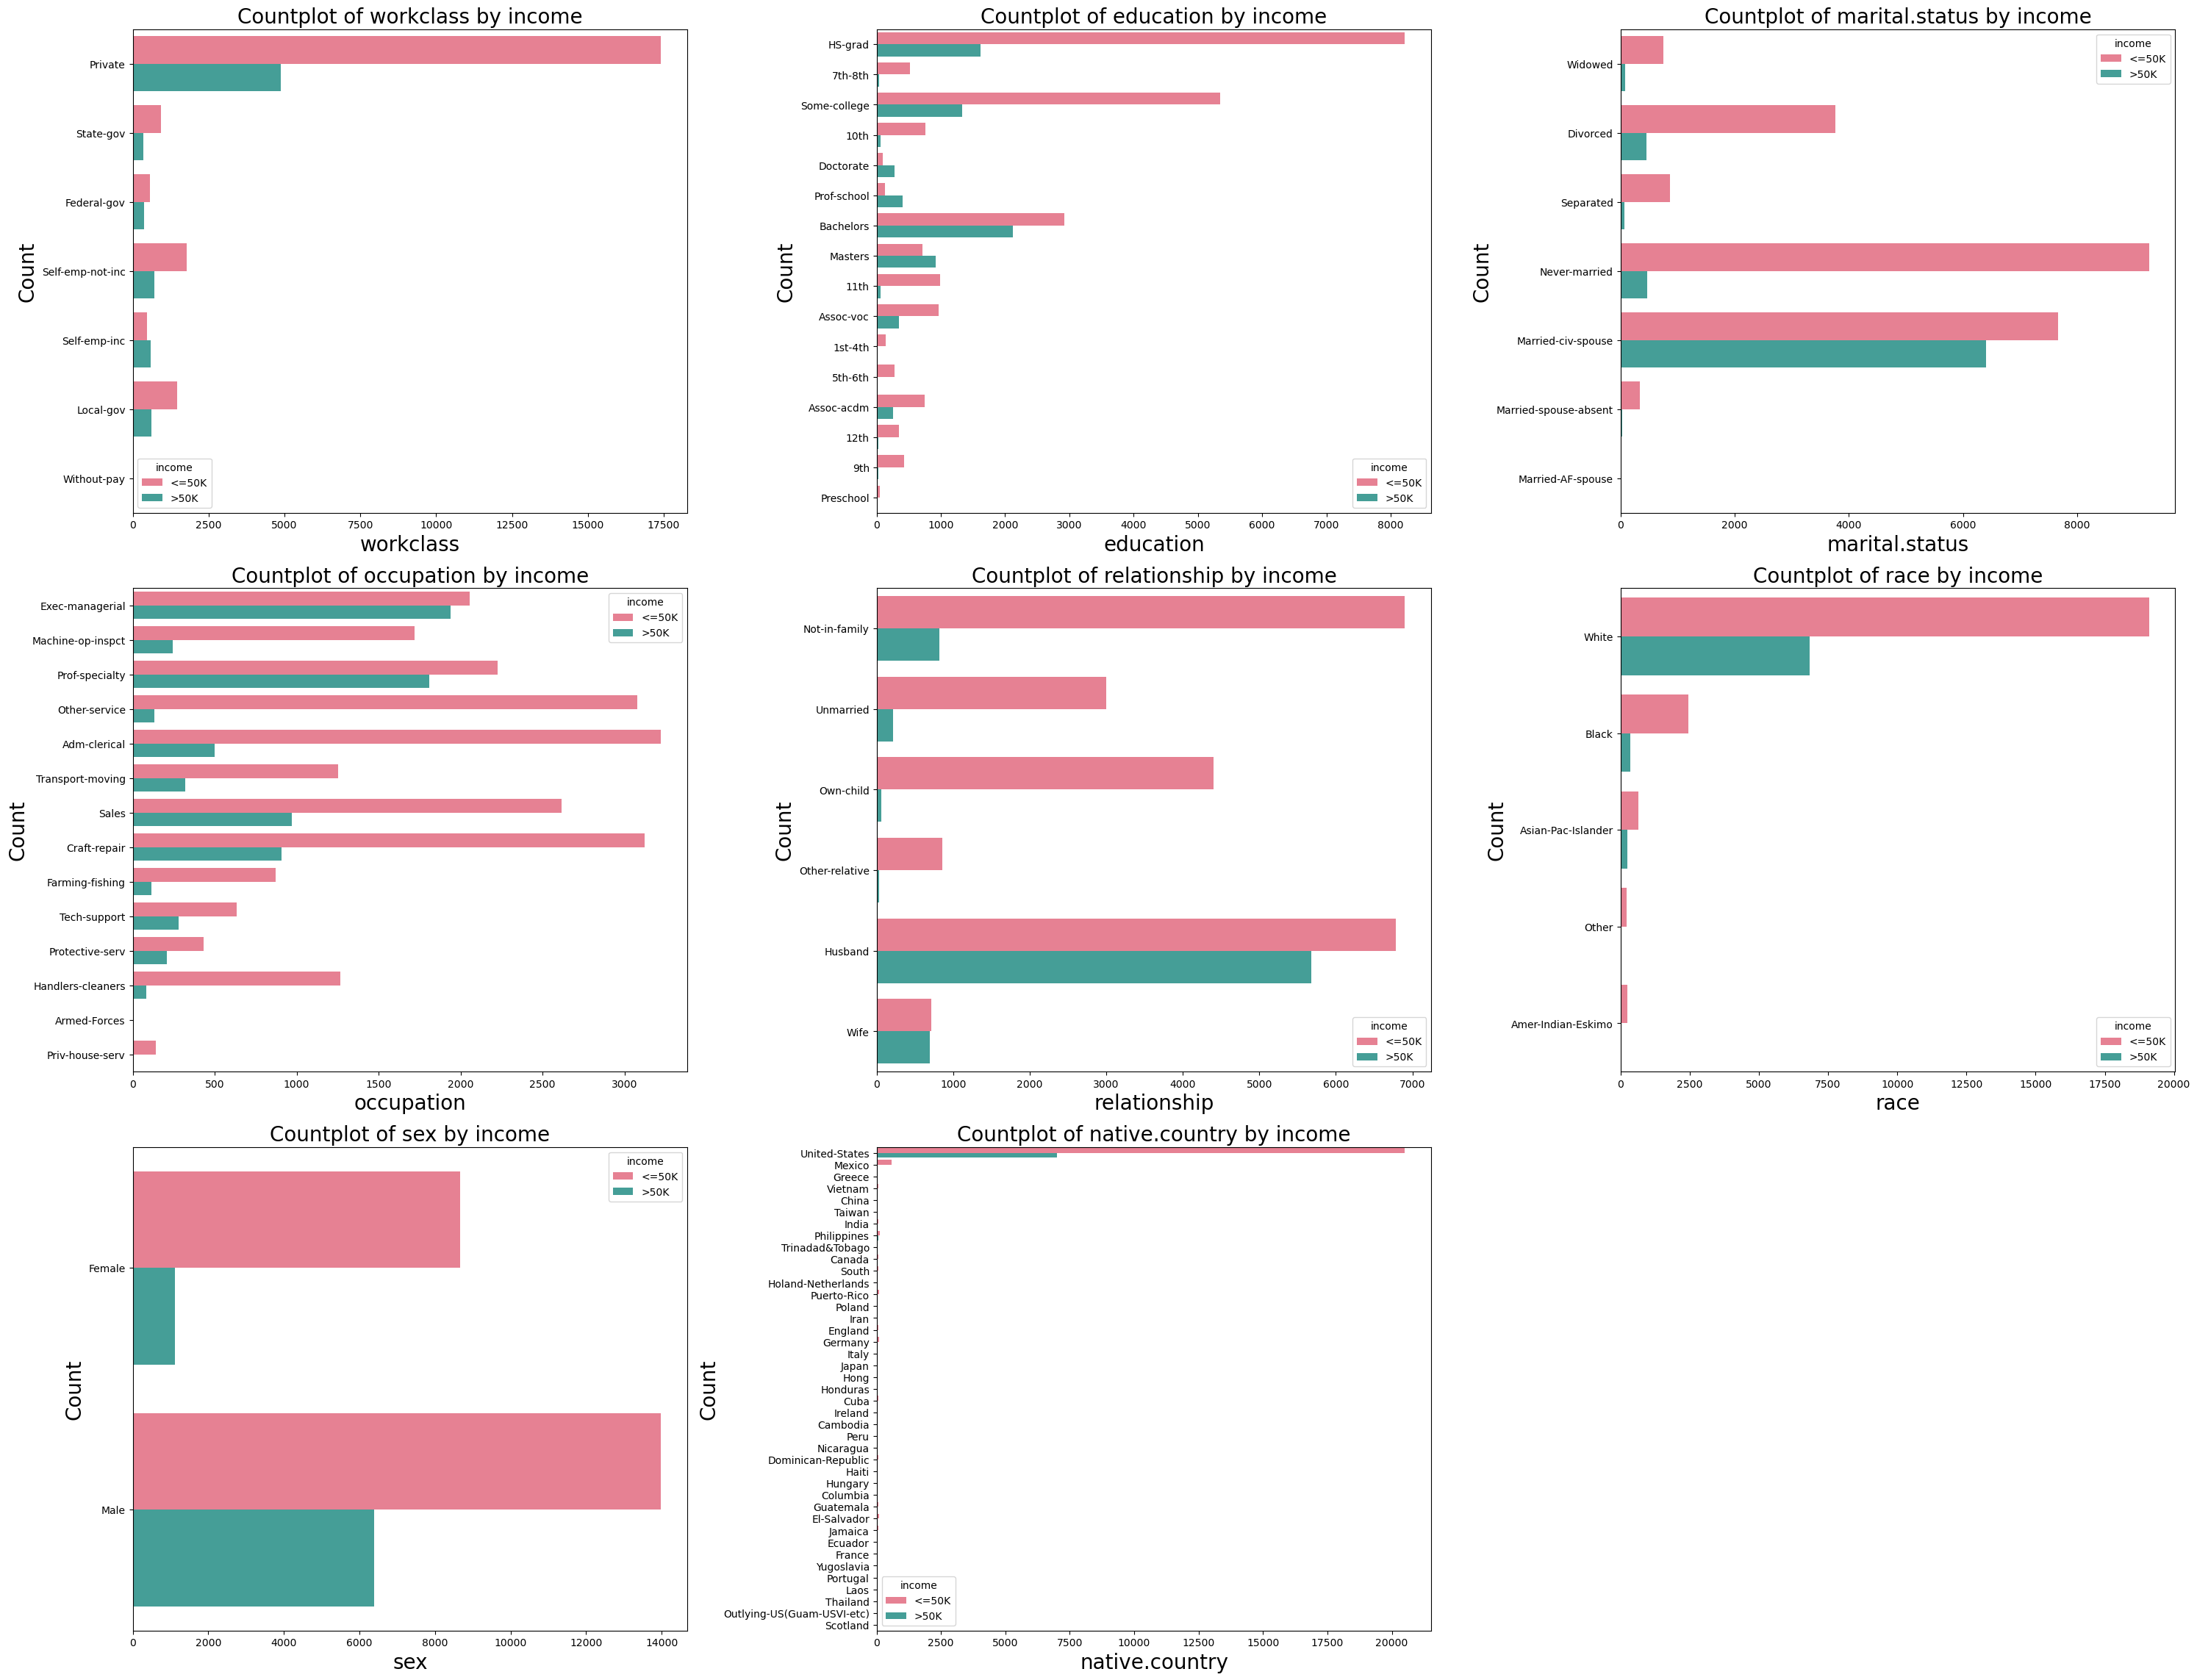

In [14]:
# Grouped Countplot of each attribute with [income]
plt.figure(figsize=(30, 30))
cat_cols = data[['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']]

for i, column in enumerate(cat_cols.columns):
    plt.subplot(4, 3, i + 1)
    sns.countplot(y=column, hue='income', data=data, palette='husl')
    plt.xlabel(column, fontsize=20)
    plt.ylabel('Count', fontsize=20)
    plt.title('Countplot of {} by income'.format(column), fontsize=20)
plt.tight_layout()
plt.show()

<Axes: xlabel='age', ylabel='education'>

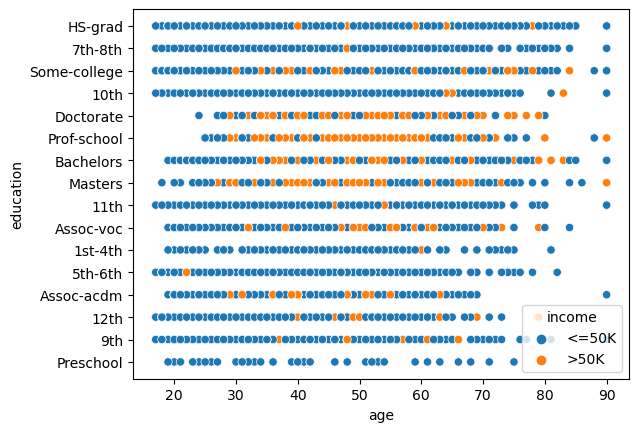

In [15]:
#Scatter plot
sns.scatterplot(x='age', y='education', hue='income', data=data)

In [16]:
############################# prepare the dataset for machine learning models #############################################
X = data_e.drop(['income'], axis=1)
X.columns = X.columns.astype(str)
y = data_e['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
############################# applying decision tree ##################################
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy (Decision Tree - test):", acc)
y_tr_pr = dt.predict(X_train)
act = accuracy_score(y_train, y_tr_pr)
print("Accuracy (Decision Tree - train):", act)

Accuracy (Decision Tree - test): 0.8130283441074092
Accuracy (Decision Tree - train): 0.9780347299929545


In [18]:
############################# applying random forest ##################################
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy (Random Forest - test):", acc)
y_tr_pr = rf.predict(X_train)
act = accuracy_score(y_train, y_tr_pr)
print("Accuracy (Random Forest - train):", act)

Accuracy (Random Forest - test): 0.8398806563898558
Accuracy (Random Forest - train): 0.9779932860872809


In [19]:
############################# applying SVM ##################################
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy (SVM - test):", acc)
y_tr_pr = model.predict(X_train)
act = accuracy_score(y_train, y_tr_pr)
print("Accuracy (SVM - train):", act)

Accuracy (SVM - test): 0.843858776727996
Accuracy (SVM - train): 0.8500145053669858


In [20]:
############################# applying KNN ##################################
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy (KNN - test):", acc)
y_tr_pr = model.predict(X_train)
act = accuracy_score(y_train, y_tr_pr)
print("Accuracy (KNN - train):", act)

Accuracy (KNN - test): 0.8229736449527598
Accuracy (KNN - train): 0.8670893945045381


In [21]:
########################### getting the optimal number of neighbors for knn #####################################

#k_values = range(1, 30)
#cv_scores = []
#for k in k_values:
#    model.n_neighbors = k
#    data_e.columns = data_e.columns.astype(str)
#    scores = cross_val_score(model, data_e, data['income'], cv=5)
#    cv_scores.append(scores.mean())
#optimal_k = k_values[cv_scores.index(max(cv_scores))]
#print("Optimal number of neighbors:", optimal_k)

Optimal number of neighbors: 7
